**1. Imports**

In [0]:
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt


_**2. _Defining_ nodes + _edges_**_

In [0]:
nodes = ["ID1", "ID2", "ID3", "ID4", "ID5"]

edges = [
    ("ID1","ID5"), ("ID1","ID3"),
    ("ID2","ID1"), ("ID2","ID3"), ("ID2","ID4"), ("ID2","ID5"),
    ("ID5","ID2"), ("ID5","ID3"),
    ("ID3","ID2"),
    ("ID4","ID3"),
]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))


Nodes: ['ID1', 'ID2', 'ID3', 'ID4', 'ID5']
Edges: [('ID1', 'ID5'), ('ID1', 'ID3'), ('ID2', 'ID1'), ('ID2', 'ID3'), ('ID2', 'ID4'), ('ID2', 'ID5'), ('ID3', 'ID2'), ('ID4', 'ID3'), ('ID5', 'ID2'), ('ID5', 'ID3')]


_**3. Runing PageRank**_

In [0]:
reset_prob = 0.2
alpha = 1 - reset_prob  # 0.8
tol = 0.1

pr = nx.pagerank(G, alpha=alpha, tol=tol)

# Sorted results
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

print("Sum of ranks:", sum(pr.values()))
print("\nFinal PageRank (sorted):")
for node, score in sorted_pr:
    print(f"{node}: {score:.5f}")


Sum of ranks: 1.0

Final PageRank (sorted):
ID2: 0.42400
ID3: 0.25600
ID5: 0.12800
ID1: 0.09600
ID4: 0.09600


_**4. Visualization :**_

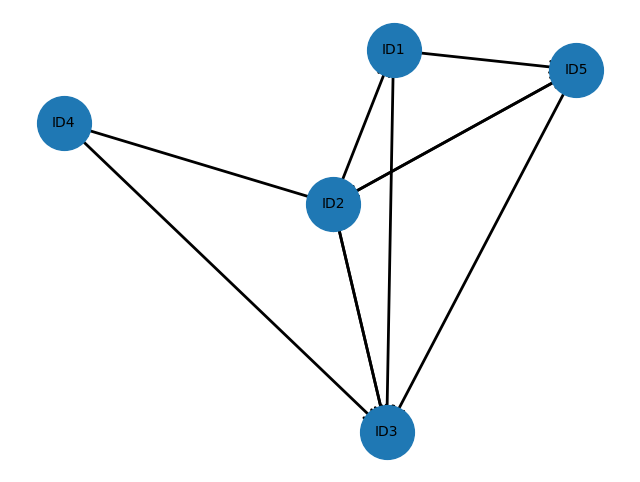

In [0]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=10)

nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, width=2)

plt.axis("off")
plt.show()